## Bank Review Sentiment Analysis Using NLTK

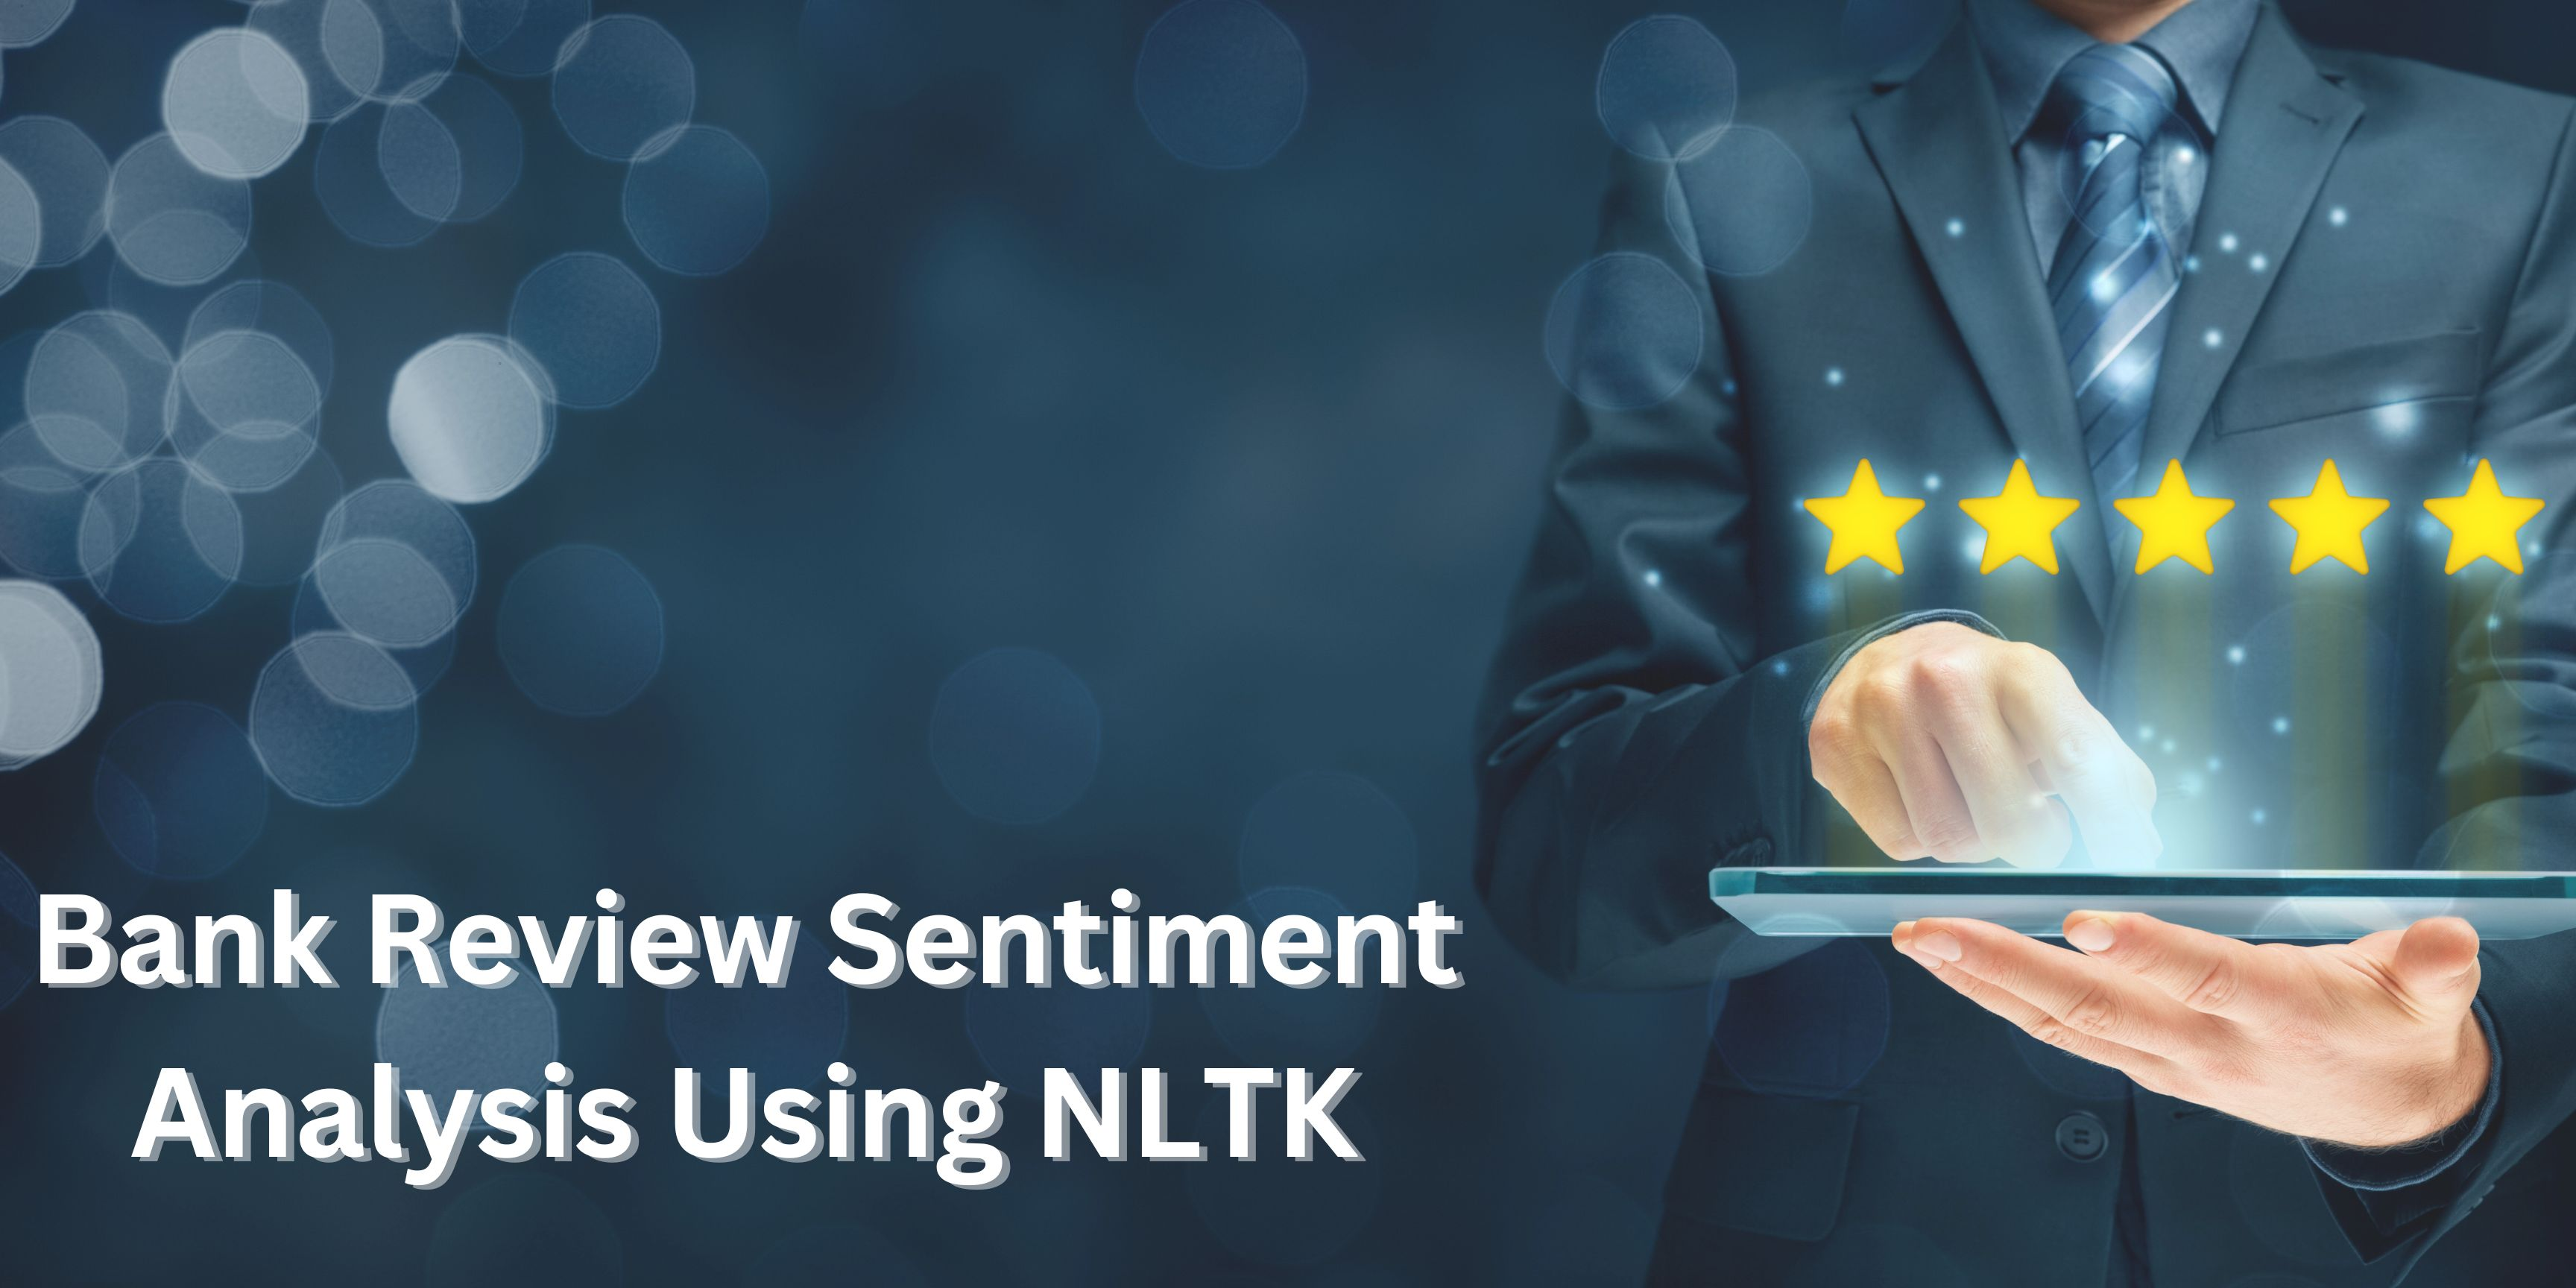

#### Source of Dataset

Kaggle: https://www.kaggle.com/datasets/dhavalrupapara/banks-customer-reviews-dataset

#### Analysis Overview

The bank review dataset consists of reviews and ratings from various banks in India. In this notebook, exploratory data analysis was performed to understand the dataset, including the locations of the banks where reviews were collected and the distribution of ratings. Visualization tools, including word clouds, were used to quickly grasp common topics in the reviews. Subsequently, text normalization followed by sentiment analysis was performed using the NLTK library. The most common keywords in negative reviews were investigated to identify potential areas of improvement.

#### Questions to be Explored
1. Which are the top 10 places where the reviews are collected from?
2. Which bank has the highest number of reviews?
3. What is the overall distribution of rating in 1000 reviews regardless of the bank and the location?
4. What is the most common vocabulary used by the user in their review title?
5. Can we help the those bank that rated 2.5 score and below to improve? Perhaps the word cloud can provide some insights.

### Import Essential Libraries

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

### Load the Dataset

In [2]:
# load the dataset
data = pd.read_csv('C:/Users/65814/OneDrive - National University of Singapore (1)/Data Analysis/data/bank_reviews3.csv')

# check the dimension of the dataset
print(data.shape)

# view the first 5 rows of the dataset
data.head()

(1000, 10)


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22


### Attributes Description:

1. author - The user who authored the review, providing valuable insights into the reviewer's identity and perspective.
2. date - The date when the review was submitted, offering a temporal dimension to the dataset and enabling time-based analysis.
3. address - The geographical location from which the review was written, contributing to understanding regional trends and variations in banking experiences.
4. bank - The name of the reviewed bank, serving as a key identifier for the financial institution being assessed.
5. rating - The user's numerical assessment of the bank's service, indicating user satisfaction on a numerical scale.
6. review_titile_by_user - The user-assigned title to their review, summarizing the essence of their feedback in a concise manner.
7. review - The detailed content of the user's review about the bank, providing the primary textual data for analysis and insights.
8. bank_image - The URL pointing to the bank's logo or image relevant to the review, facilitating visual associations with the bank.
9. rating_title_by_user - The user-assigned title to their rating, potentially offering additional context to the rating value.
10. useful_count - The count of users who found the review helpful, reflecting the impact and usefulness of the review among other users.

In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                996 non-null    object 
 1   date                  1000 non-null   object 
 2   address               1000 non-null   object 
 3   bank                  1000 non-null   object 
 4   rating                1000 non-null   float64
 5   review_title_by_user  1000 non-null   object 
 6   review                1000 non-null   object 
 7   bank_image            1000 non-null   object 
 8   rating_title_by_user  1000 non-null   object 
 9   useful_count          1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [4]:
# remove columns that are not using for analysis
# columns to remove: ['author', 'date', 'bank_image']

data.drop(columns=['author', 'date', 'bank_image'], axis=1, inplace=True)

In [5]:
# total number of bank and address in the dataset

numAddress = data['address'].nunique()
numBank = data['bank'].nunique()

print(f'The reviews are collected from {numBank} different banks that located around {numAddress} of places in India.')
print('These banks are: ', data.bank.unique())

The reviews are collected from 10 different banks that located around 107 of places in India.
These banks are:  ['SBI' 'Axis Bank' 'HDFC Bank' 'review' 'IDBI' 'Kotak' 'IndusInd Bank'
 'Canara Bank' 'Citibank' 'Punjab National Bank']


In [6]:
# some of the data without 'bank' name and is named as 'review' in the dataset
# convert these data to 'Unknown'

data['bank'].replace('review','Unknow', inplace=True)

### Exploratory Data Analysis

#### Question: Which are the top 10 places where the reviews are collected from?

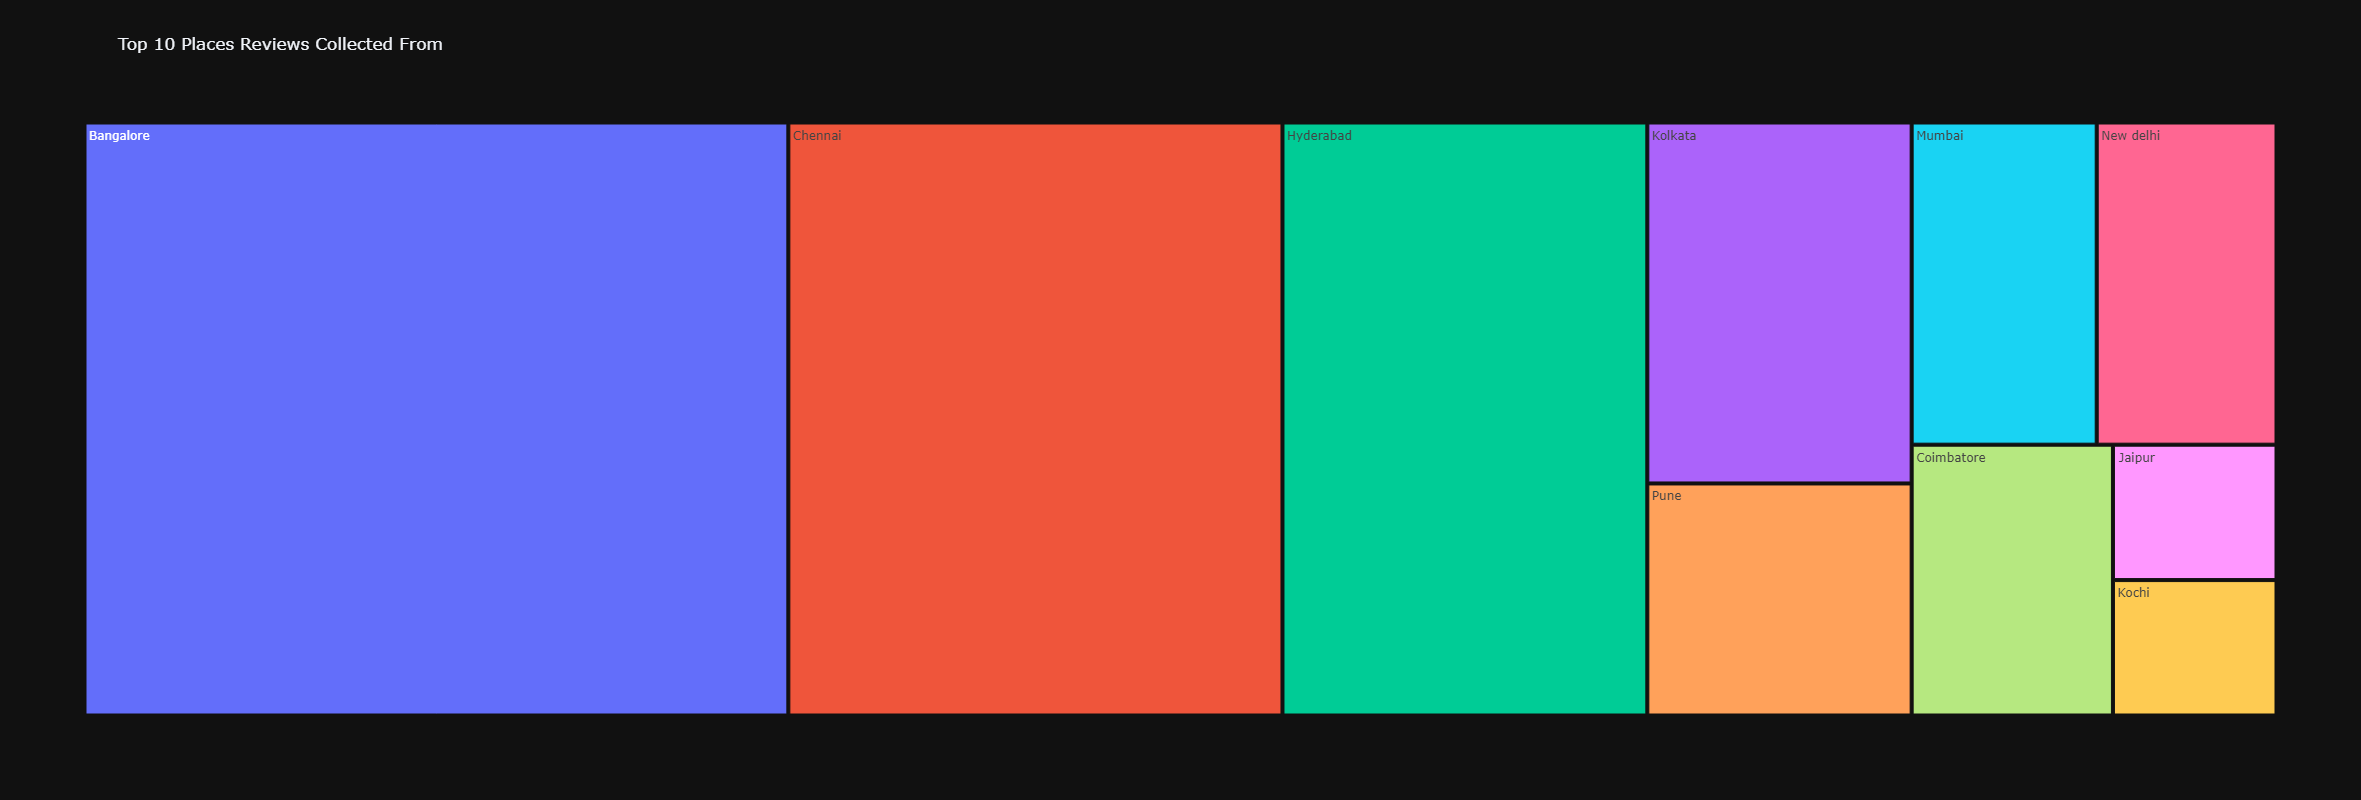

In [23]:
# get the count value for the 'address' attribute
address = data['address'].value_counts().sort_values(ascending=False)[:10]
address_df = pd.DataFrame(address).reset_index()
address_df.columns = ['address', 'count']


fig = px.treemap(address_df, path=['address'], values='count', width=900, height=800, template='plotly_dark', title='Top 10 Places Reviews Collected From')
fig.show()

#### Question: Which bank has the highest number of reviews?

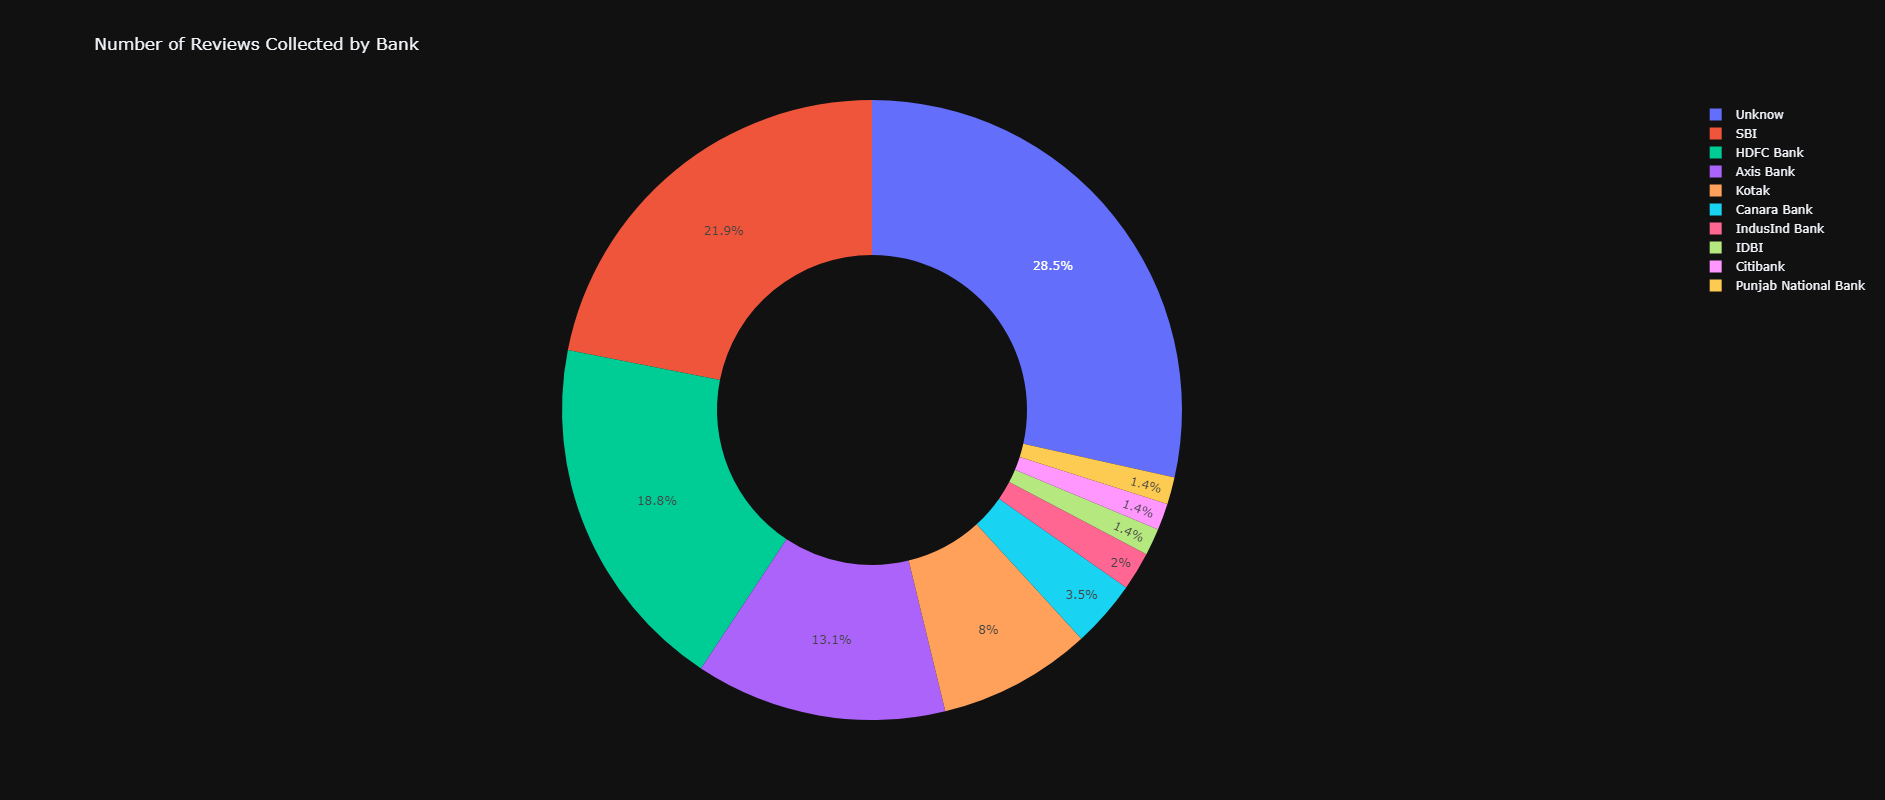

In [8]:
# calculate the count value of 'bank'
bank = data['bank'].value_counts()
bank_df = pd.DataFrame(bank).reset_index()
bank_df.columns = ['bank','count']

fig = px.pie(bank_df, values='count', names='bank', hole=0.5, width=900, height=800, template='plotly_dark', title='Number of Reviews Collected by Bank')
fig.show()

#### Question: What is the overall distribution of rating in 1000 reviews regardless of the bank and the location?

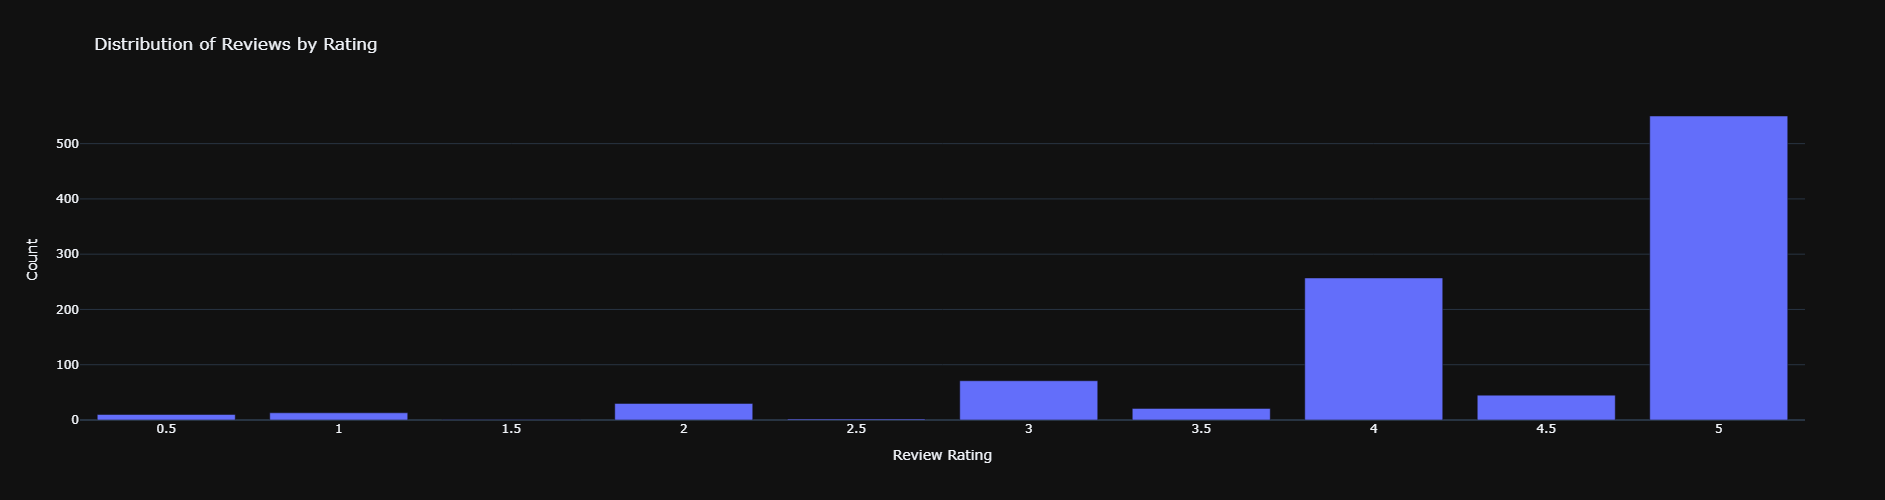

In [9]:
# calculate the count value for the rating
rating = data['rating'].value_counts().sort_index()
rating_df = pd.DataFrame(rating).reset_index()
rating_df.columns = ['rating', 'count']

fig = px.bar(rating_df, x='rating', y='count', hover_data=['rating', 'count'], width=900, height=500, template='plotly_dark', title='Distribution of Reviews by Rating')
fig.update_layout(
    xaxis=dict(
        title='Review Rating',
        tickmode='linear',
        tick0=rating_df['rating'].min(),
        dtick=0.5
    ),
    yaxis=dict(
        title='Count'
    )
)
fig.show()

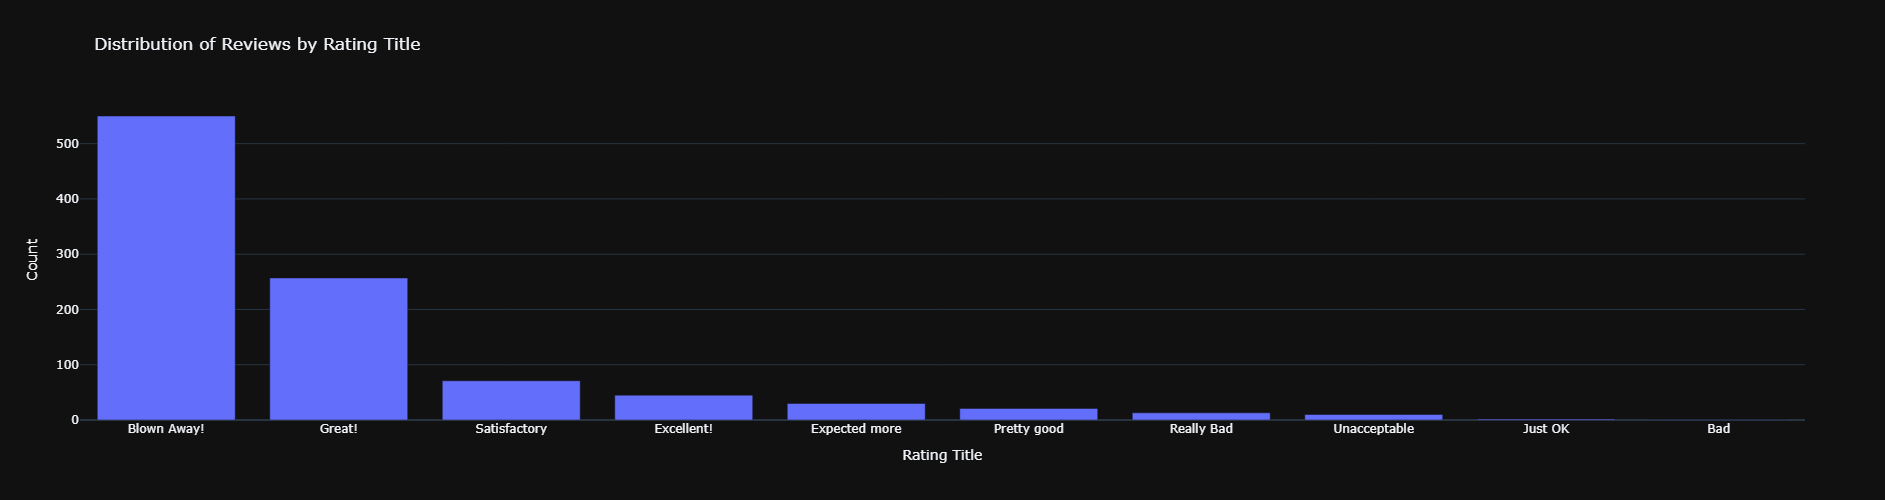

In [10]:
# caluclate the count value for the rating title
rating_title = data['rating_title_by_user'].value_counts()
rating_title_df = pd.DataFrame(rating_title).reset_index()
rating_title_df.columns = ['rating_title', 'count']

fig = px.bar(rating_title_df, x=rating_title_df['rating_title'], y=rating_title_df['count'], width=900, height=500, template='plotly_dark', title='Distribution of Reviews by Rating Title')
fig.update_layout(
    xaxis = dict(
        title='Rating Title'
    ),
    yaxis = dict(
        title='Count'
    )
)
fig.show()

### Text Analysis

#### Question: What is the most common vocabulary used by the user in their review title?

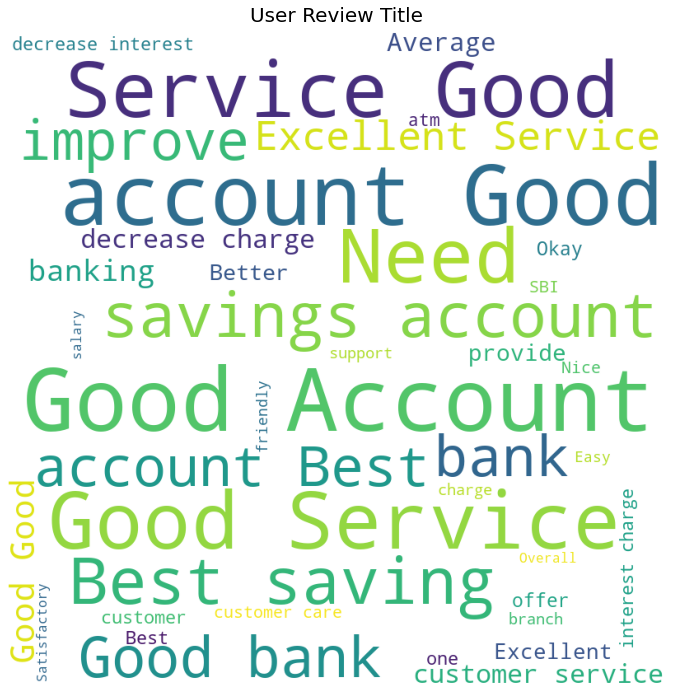

In [11]:
from wordcloud import WordCloud

combined_title = ' '.join(data['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 15).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('User Review Title', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

#### Question: Can we help the those bank that rated 2.5 score and below to improve? Perhaps the word cloud can provide some insights.

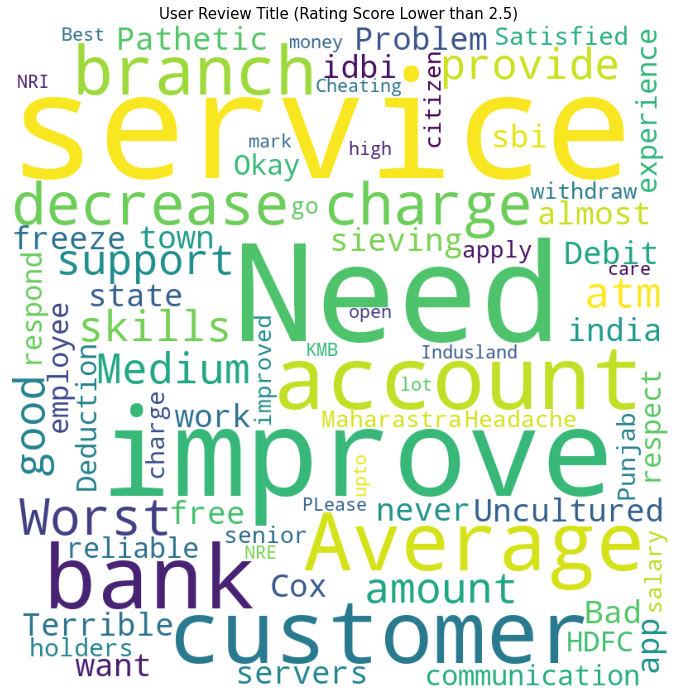

In [12]:
# subset the data that rating score is 2.5 and lower
data_copy = data.copy()
data_copy = data[data['rating']<=2.5]

combined_title_lowrate = ' '.join(data_copy['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_lowrate = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 15).generate(combined_title_lowrate)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_lowrate)
plt.axis('off')
plt.title('User Review Title (Rating Score Lower than 2.5)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

### Sentiment Analysis

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the object of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\65814\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# calculate the polarity scores of the review
data['polarity'] = data['review'].apply(sia.polarity_scores)
data['compound'] = data['polarity'].apply(lambda x: x.get('compound'))

In [15]:
# define a function to perform the sentiment categorization
def categorize(score):
    if score < 0:
        return 'To be Improved'
    elif score > 0.8:
        return 'Blown Away'
    else:
        return 'Neutral'

In [16]:
# insert a new column 'Sentiment_Category' by categorized the sentiment based on the compound score
data['Sentiment_Category'] = data['compound'].apply(categorize)

# view the first 5 rows of the data after new columns inserted
data.head()

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count,polarity,compound,Sentiment_Category
0,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,133,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.7264,Neutral
1,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,89,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.7165,Neutral
2,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,48,"{'neg': 0.08, 'neu': 0.785, 'pos': 0.135, 'com...",0.4588,Neutral
3,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,52,"{'neg': 0.042, 'neu': 0.849, 'pos': 0.108, 'co...",0.5267,Neutral
4,Bangalore,Unknow,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.7357,Neutral


##### Let's get some insights from the negative sentiments.

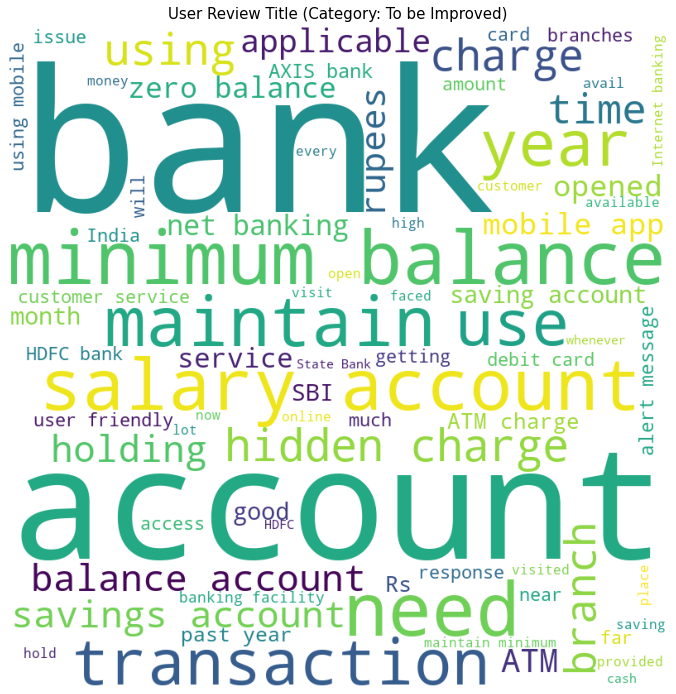

In [17]:
data_copy = data.copy()
data_copy = data[data['Sentiment_Category']=='To be Improved']

combined_tobeImproved = ' '.join(data_copy['review'])


# create a word cloud using the combined text
wordcloud_tobeImproved = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 15).generate(combined_tobeImproved)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_tobeImproved)
plt.axis('off')
plt.title('User Review Title (Category: To be Improved)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

##### Let's remove the regular expression and some common words in the review from the negative sentiments.

In [18]:
import re

common_words = ['bank', 'account']

pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, common_words)) + r')\b', flags=re.IGNORECASE)
filtered_string = pattern.sub('', combined_tobeImproved)

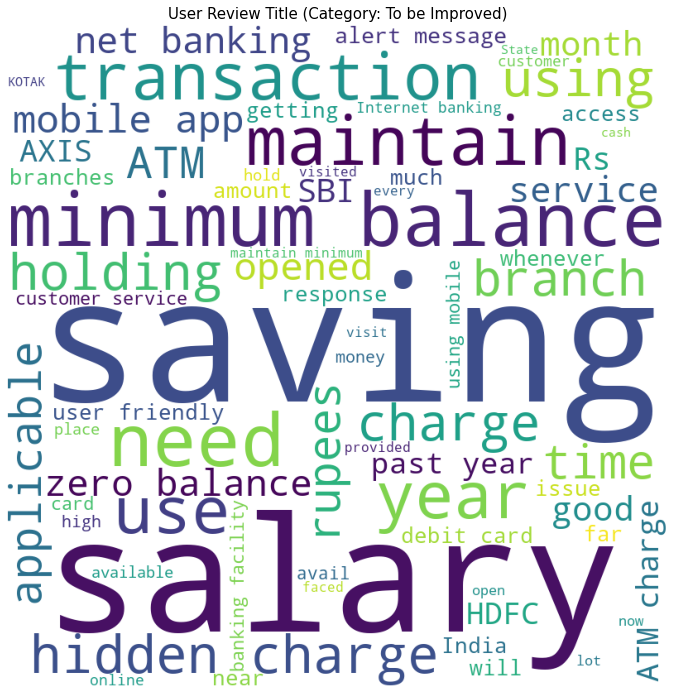

In [ ]:
# create a word cloud using the combined text
wordcloud_tobeImproved = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 15).generate(filtered_string)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_tobeImproved)
plt.axis('off')
plt.title('User Review Title (Category: To be Improved)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [ ]:
import re

pattern = r'[^\w\s]' #  matches any character that is not a word character (\w) or whitespace (\s)
cleaned_text = re.sub(pattern, '', combined_tobeImproved)

# get the list of stipwords in nltk
stopwords = nltk.corpus.stopwords.words('english')

# removw the stopwords from the review of category 'to be improved'
tokens: list[str] = nltk.word_tokenize(cleaned_text)
processed_text = [w for w in tokens if w.lower() not in stopwords]

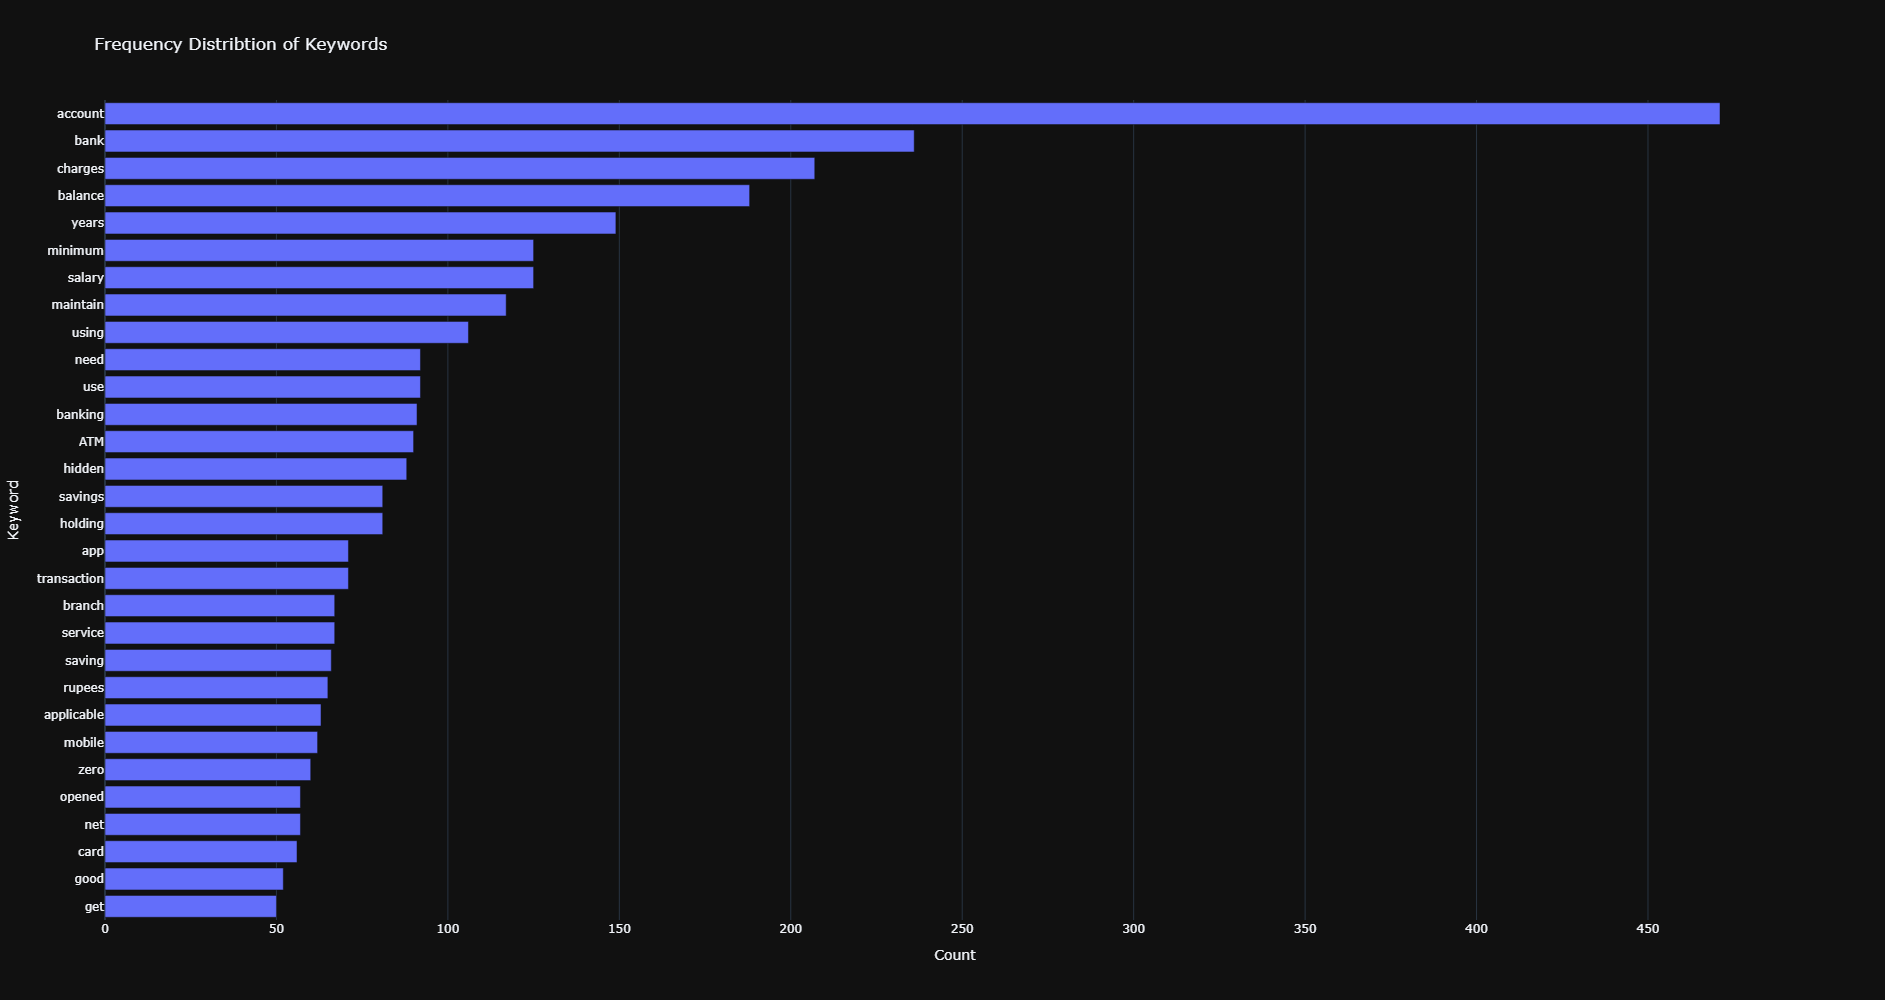

In [ ]:
# let's check the top 30 common words in the review of category 'to be improved'
fd = nltk.FreqDist(processed_text)
top30_keyword = fd.most_common(30)

top30_keyword_df = pd.DataFrame(top30_keyword)
top30_keyword_df.columns = ['Keyword', 'Count']
keyword_df = top30_keyword_df.sort_values(by='Count', ascending=True)

fig = px.bar(keyword_df, x=keyword_df['Count'], y=keyword_df['Keyword'], width=800, height=1000, template='plotly_dark', title='Frequency Distribtion of Keywords')
fig.update_layout(
    xaxis = dict(
        title='Count'
    ),
    yaxis = dict(
        title='Keyword'
    )
)
fig.show()

### Summary

In conducting sentiment analysis and visualizing the results through a word cloud, notable keywords emerged in negative reviews. Common issues highlighted by customers include concerns about minimum balance requirements, hidden charges, ATM fees, and aspects related to customer service. These key themes provide valuable insights into areas that may require attention and improvement for a more positive customer experience.